In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from pathlib import Path

In [3]:
pi_dir = Path("../Experiments_Revision/PERNN/")
dnn_s_dir = Path("../Experiments_Revision/FCNN_s")
dnn_m_dir = Path("../Experiments_Revision/FCNN_m")
dnn_l_dir = Path("../Experiments_Revision//FCNN_l")


In [4]:
pi_tracks = sorted(list(pi_dir.glob("*/*.pickle")))
dnn_s_tracks = sorted(list(dnn_s_dir.glob("*/*.pickle")))
dnn_m_tracks = sorted(list(dnn_m_dir.glob("*/*.pickle")))
dnn_l_tracks = sorted(list(dnn_l_dir.glob("*/*.pickle")))

pi_tracks, dnn_s_tracks, dnn_m_tracks, dnn_l_tracks

([PosixPath('../Experiments_Revision/PINN_s/alpine-2/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/alpine-2/episode_2.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-1/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-1/episode_2.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-2/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-2/episode_2.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-3/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-3/episode_2.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-4/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-4/episode_2.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-5/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/dirt-5/episode_2.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/ruudskogen/episode_1.pickle'),
  PosixPath('../Experiments_Revision/PINN_s/ruudskogen/episode_2.pick

### Track wise


In [5]:
def read_track(track_file):
    d = None
    with open(track_file, "rb") as f:
        d = pickle.load(f)
    return d

def read_model(files):
    files_to_read = []
    data = []
    _ = [files_to_read.extend(f) for f in files]
    for f in files_to_read:
        with open(f, "rb") as f:
            d = pickle.load(f)
        data.extend(d)
    return data

In [6]:
pi_data = pd.concat([pd.DataFrame(read_track(track_file.as_posix())) for track_file in pi_tracks])
dnn_s_data = pd.concat([pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_s_tracks])
dnn_m_data = pd.concat([pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_m_tracks])
dnn_l_data = pd.concat([pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_l_tracks])



In [7]:
dt = 0.1
steering_angles_s = dnn_s_data['steer'].values
steering_vel_s = np.diff(steering_angles_s) / dt 
steering_acc_s = np.diff(steering_vel_s) / dt
jerk_s = np.diff(steering_acc_s) / dt  

steering_angles_m = dnn_m_data['steer'].values
steering_vel_m = np.diff(steering_angles_m) / dt 
steering_acc_m = np.diff(steering_vel_m) / dt
jerk_m = np.diff(steering_acc_m) / dt  

steering_angles_l = dnn_l_data['steer'].values
steering_vel_l = np.diff(steering_angles_l) / dt 
steering_acc_l = np.diff(steering_vel_l) / dt
jerk_l = np.diff(steering_acc_l) / dt  

np.mean(jerk_s), np.mean(jerk_m), np.mean(jerk_l)

(0.001410344, 0.008109741, 0.034729563)

In [8]:
dt = 0.1
steering_angles_pi = pi_data['steer'].values

steering_vel_pi = np.diff(steering_angles_pi) / dt 

steering_acc_pi = np.diff(steering_vel_pi) / dt

jerk_pi = np.diff(steering_acc_pi) / dt  

np.mean(jerk_pi)

-0.00011424392

In [9]:
fig, ax = plt.subplots(ncols=4, nrows=3, dpi=600)
fig.set_figwidth(15)
fig.set_figheight(15)

bins=15


ax[0][0].hist(steering_angles_s, color='#5975A4', bins=bins, density=False)
ax[0][0].set_title("FCN-small", fontsize=15)

ax[0][1].hist(steering_angles_m, color='#CC8963', bins=bins, density=False)
ax[0][1].set_title("FCN-medium", fontsize=15)

ax[0][2].hist(steering_angles_l, color='#5F9E6E', bins=bins, density=False)
ax[0][2].set_title("FCN-large", fontsize=15)

ax[0][3].hist(steering_angles_pi, color='#B55D60', bins=bins, density=False)
ax[0][3].set_title("PERNN", fontsize=15)

for a in ax[0]:
    a.set_xlim(-2, 2)
    
bins=20
    
ax[1][0].hist(steering_vel_s, color='#5975A4', bins=bins, density=False)
ax[1][1].hist(steering_vel_m, color='#CC8963', bins=bins, density=False)
ax[1][2].hist(steering_vel_l, color='#5F9E6E', bins=bins, density=False)
ax[1][3].hist(steering_vel_pi, color='#B55D60', bins=bins, density=False)

for a in ax[1]:
    a.set_xlim(-10, 10)
    
bins=20

ax[2][0].hist(jerk_s, color='#5975A4', bins=bins, density=False)
ax[2][1].hist(jerk_m, color='#CC8963', bins=bins, density=False)
ax[2][2].hist(jerk_l, color='#5F9E6E', bins=bins, density=False)
ax[2][3].hist(jerk_pi, color='#B55D60', bins=bins, density=False)



ax[0][0].set_ylabel("Steer Angle", rotation='horizontal', loc='top', fontsize=15)
ax[1][0].set_ylabel("Steer Velocity", rotation='horizontal', loc='top', fontsize=15)
ax[2][0].set_ylabel("Steer Jerk", rotation='horizontal', loc='top', fontsize=15)

fig.savefig("hist_jerk.png")

In [10]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

(0.0, 200.0)

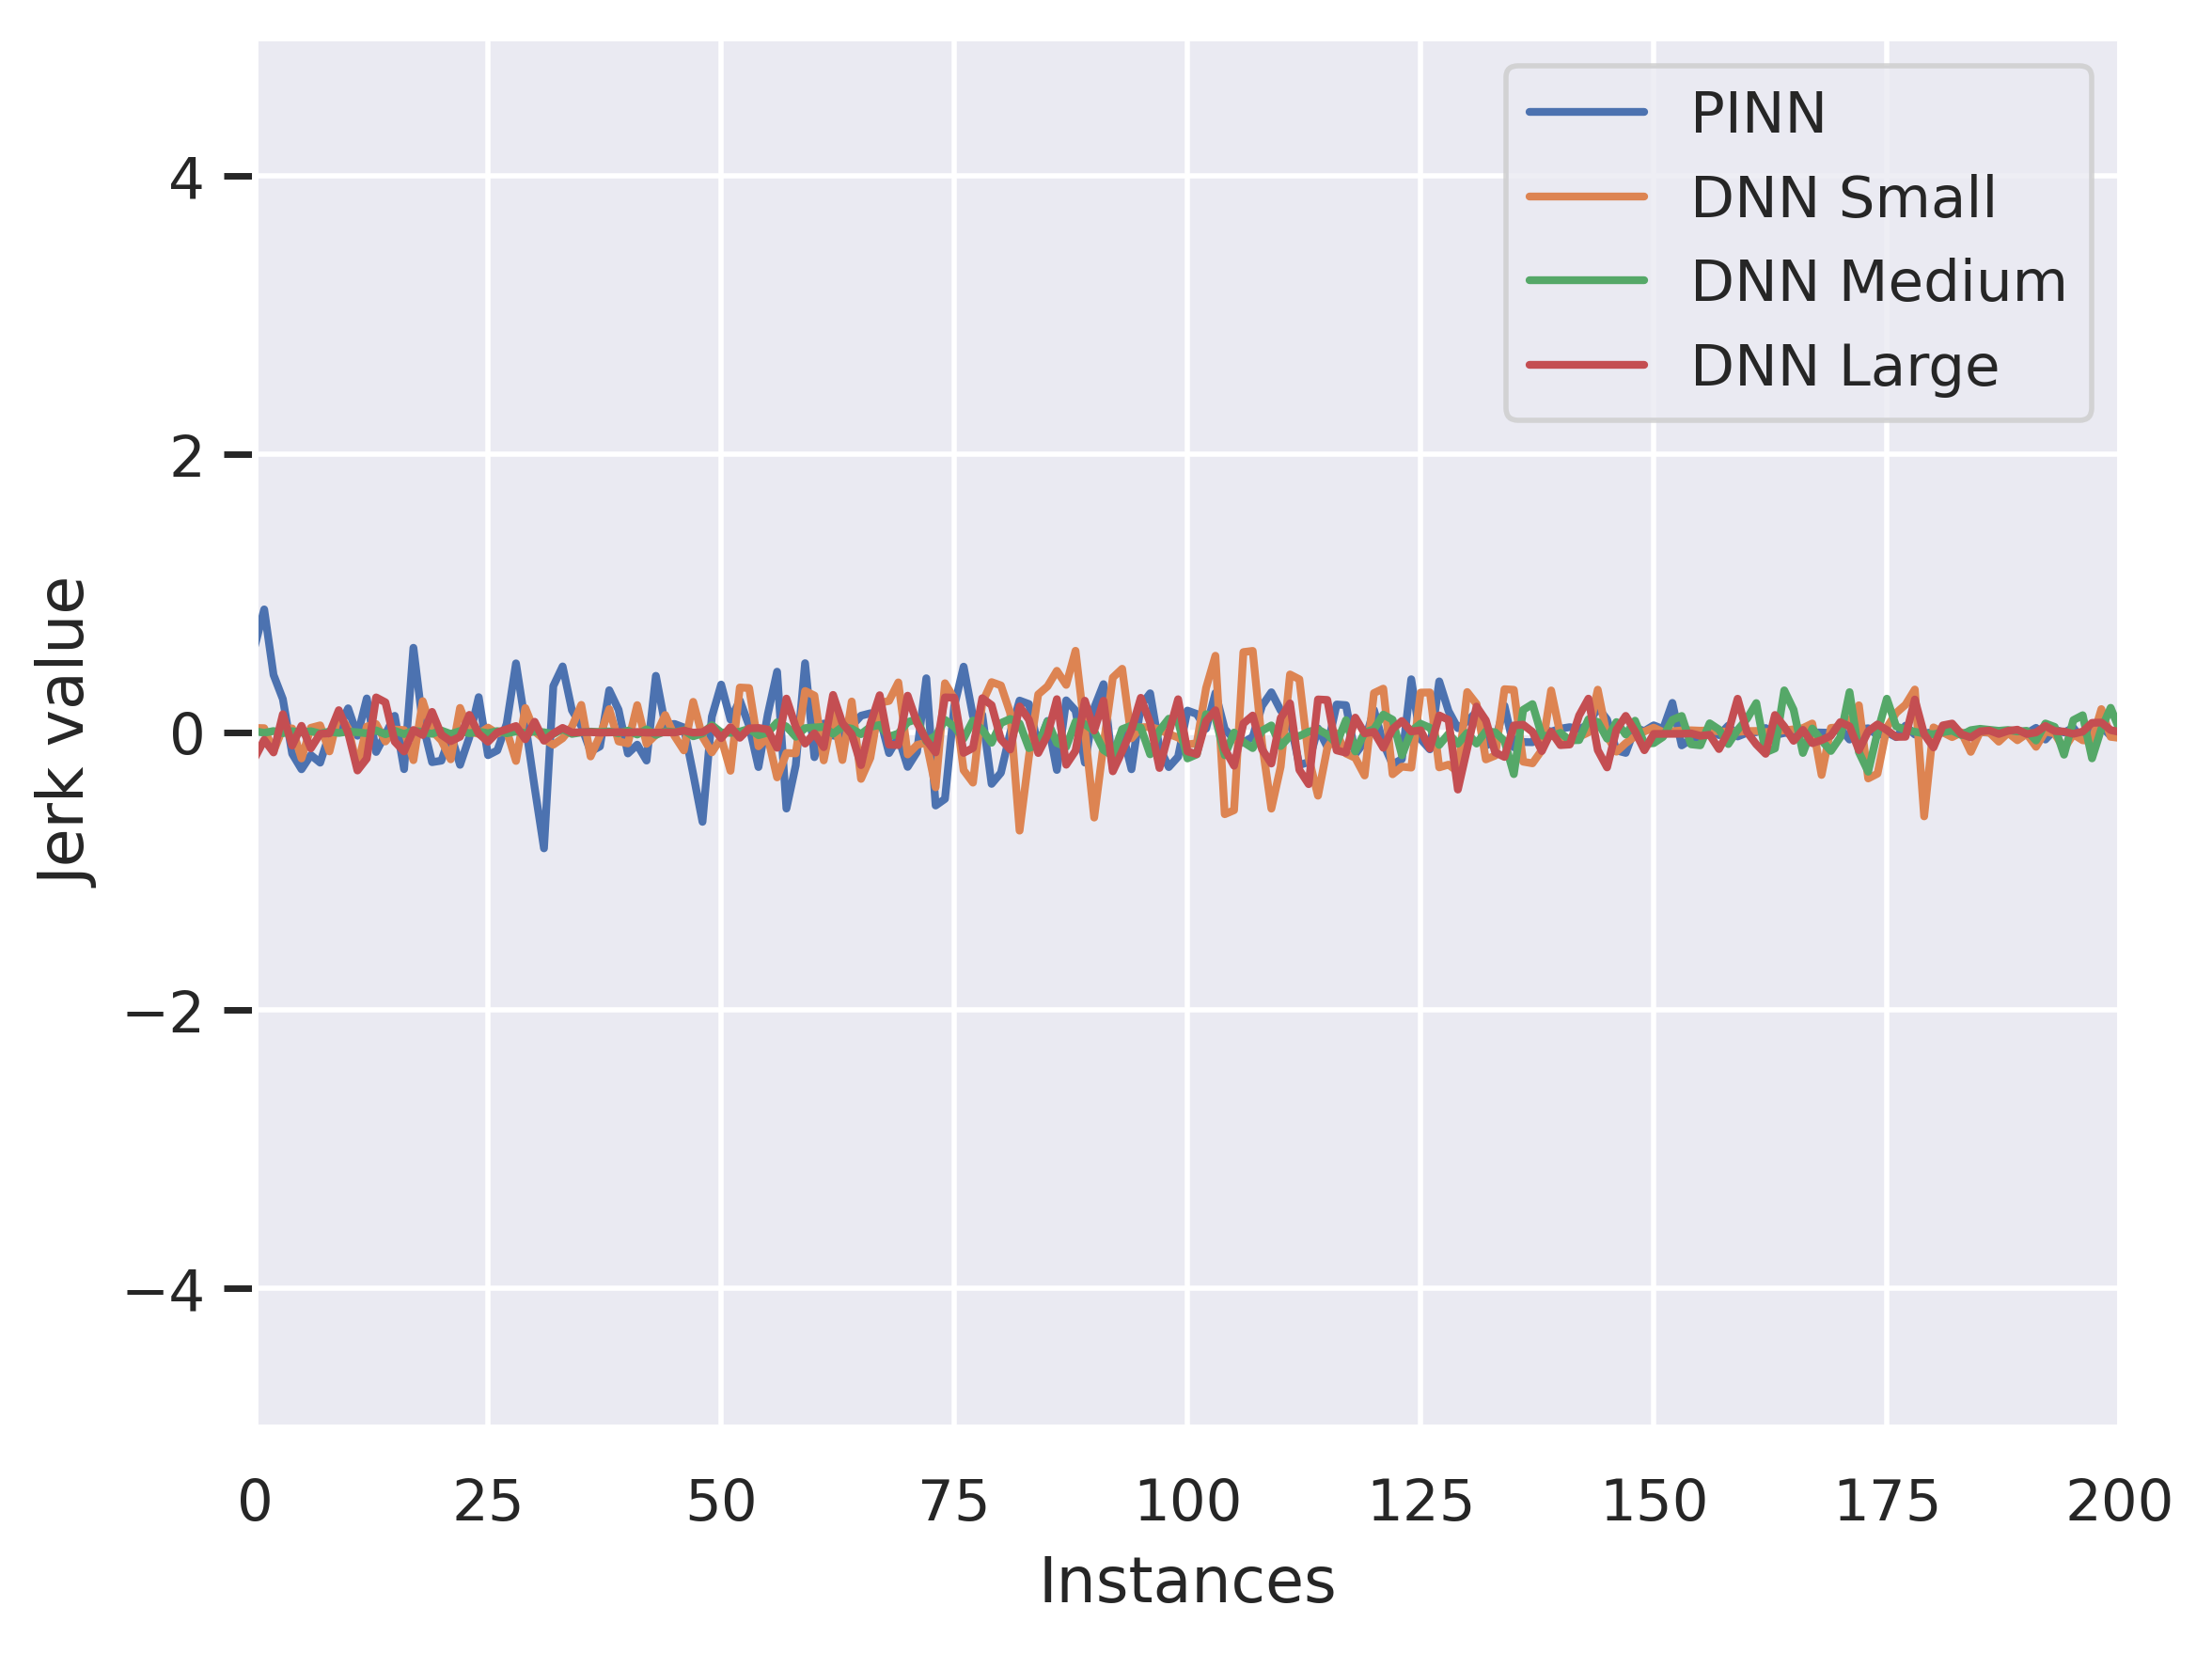

In [11]:
fig, ax = plt.subplots(dpi=400)

# ax.plot(steering_vel_pi)
# ax.plot(steering_vel_s)
# ax.plot(steering_vel_m)
# ax.plot(steering_vel_l)

ax.plot(moving_average(steering_vel_pi, 30))
ax.plot(moving_average(steering_vel_s, 30))
ax.plot(moving_average(steering_vel_m, 30))
ax.plot(moving_average(steering_vel_l, 30))

ax.legend(['PINN', 'DNN Small', 'DNN Medium', 'DNN Large'])


ax.tick_params(bottom=False, left=True)
ax.set_ylabel("Jerk value")
ax.set_xlabel("Instances")

ax.set_ylim(-5, 5)
ax.set_xlim(0, 200)

#fig.savefig("avg_jerk_s.png")

(0.0, 50.0)

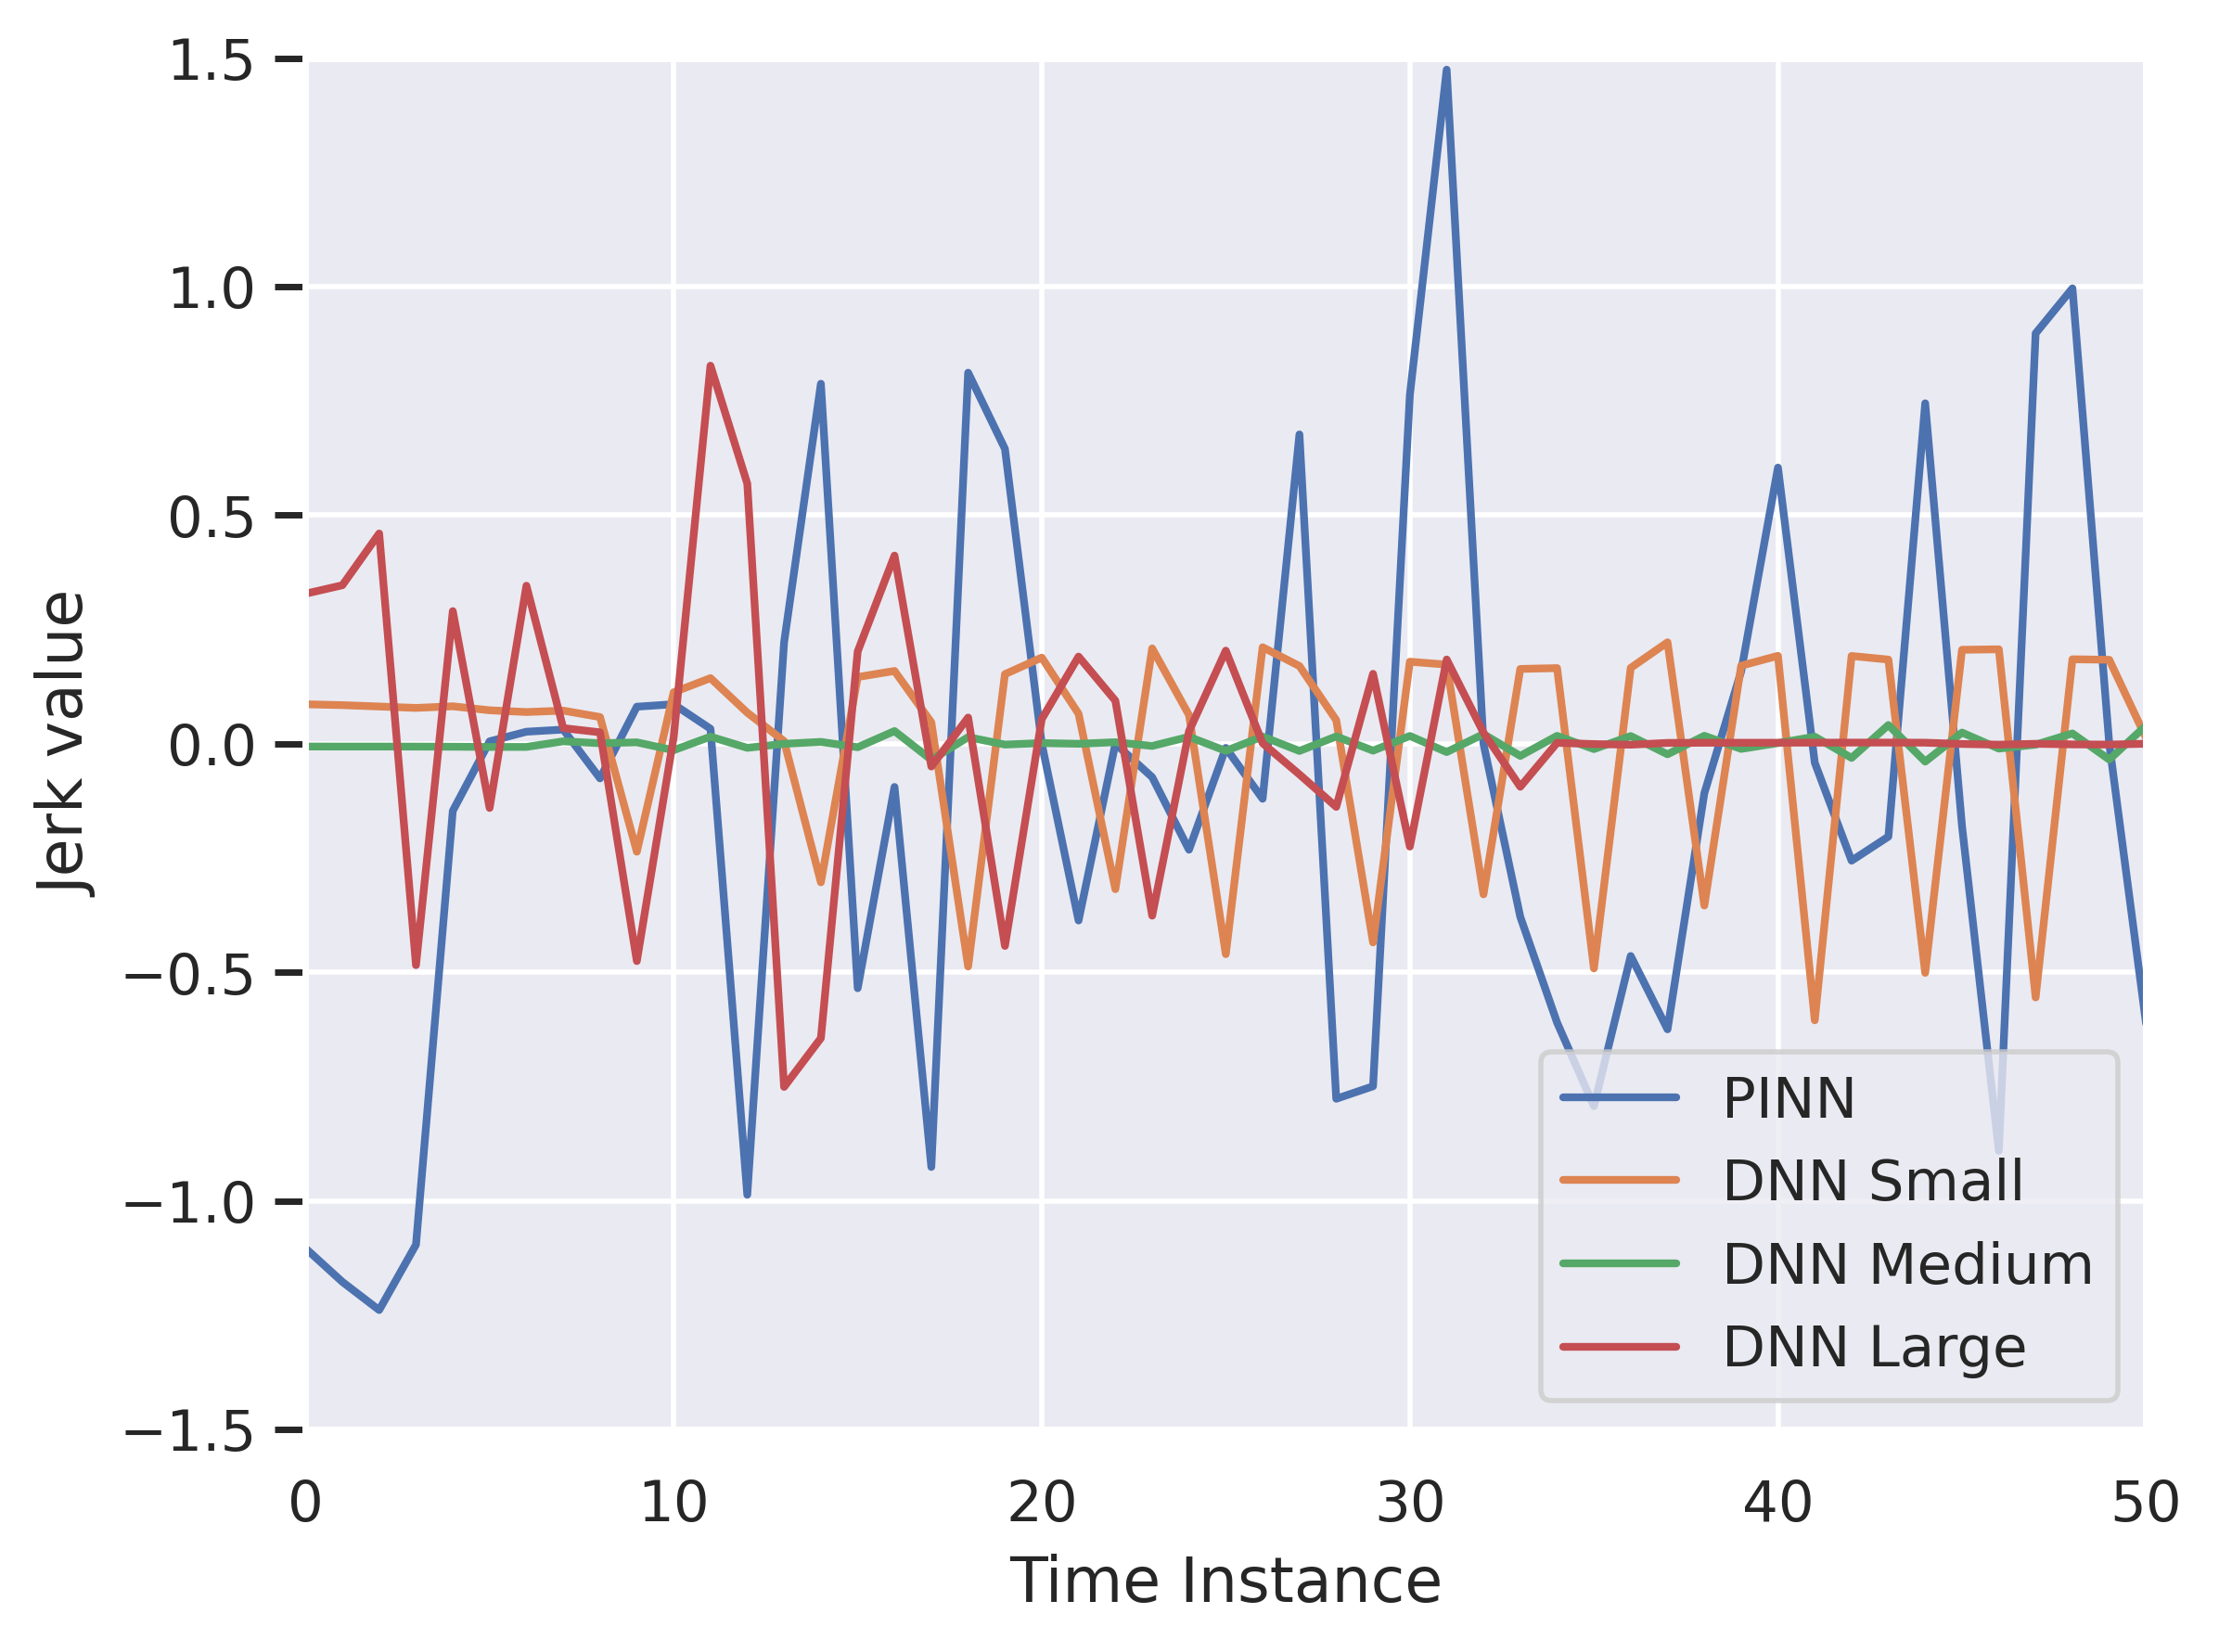

In [12]:
fig, ax = plt.subplots(dpi=400)

ax.plot(pi_data['steer'].values)
ax.plot(dnn_s_data['steer'].values)
ax.plot(dnn_m_data['steer'].values)
ax.plot(dnn_l_data['steer'].values)

ax.legend(['PINN', 'DNN Small', 'DNN Medium', 'DNN Large'])


ax.tick_params(bottom=False, left=True)
ax.set_ylabel("Jerk value")
ax.set_xlabel("Time Instance")

ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 50)

#fig.savefig("avg_jerk_s.png")

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [14]:
pi_data = [pd.DataFrame(read_track(track_file.as_posix())) for track_file in pi_tracks]
dnn_s_data = [pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_s_tracks]
dnn_m_data = [pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_m_tracks]
dnn_l_data = [pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_l_tracks]


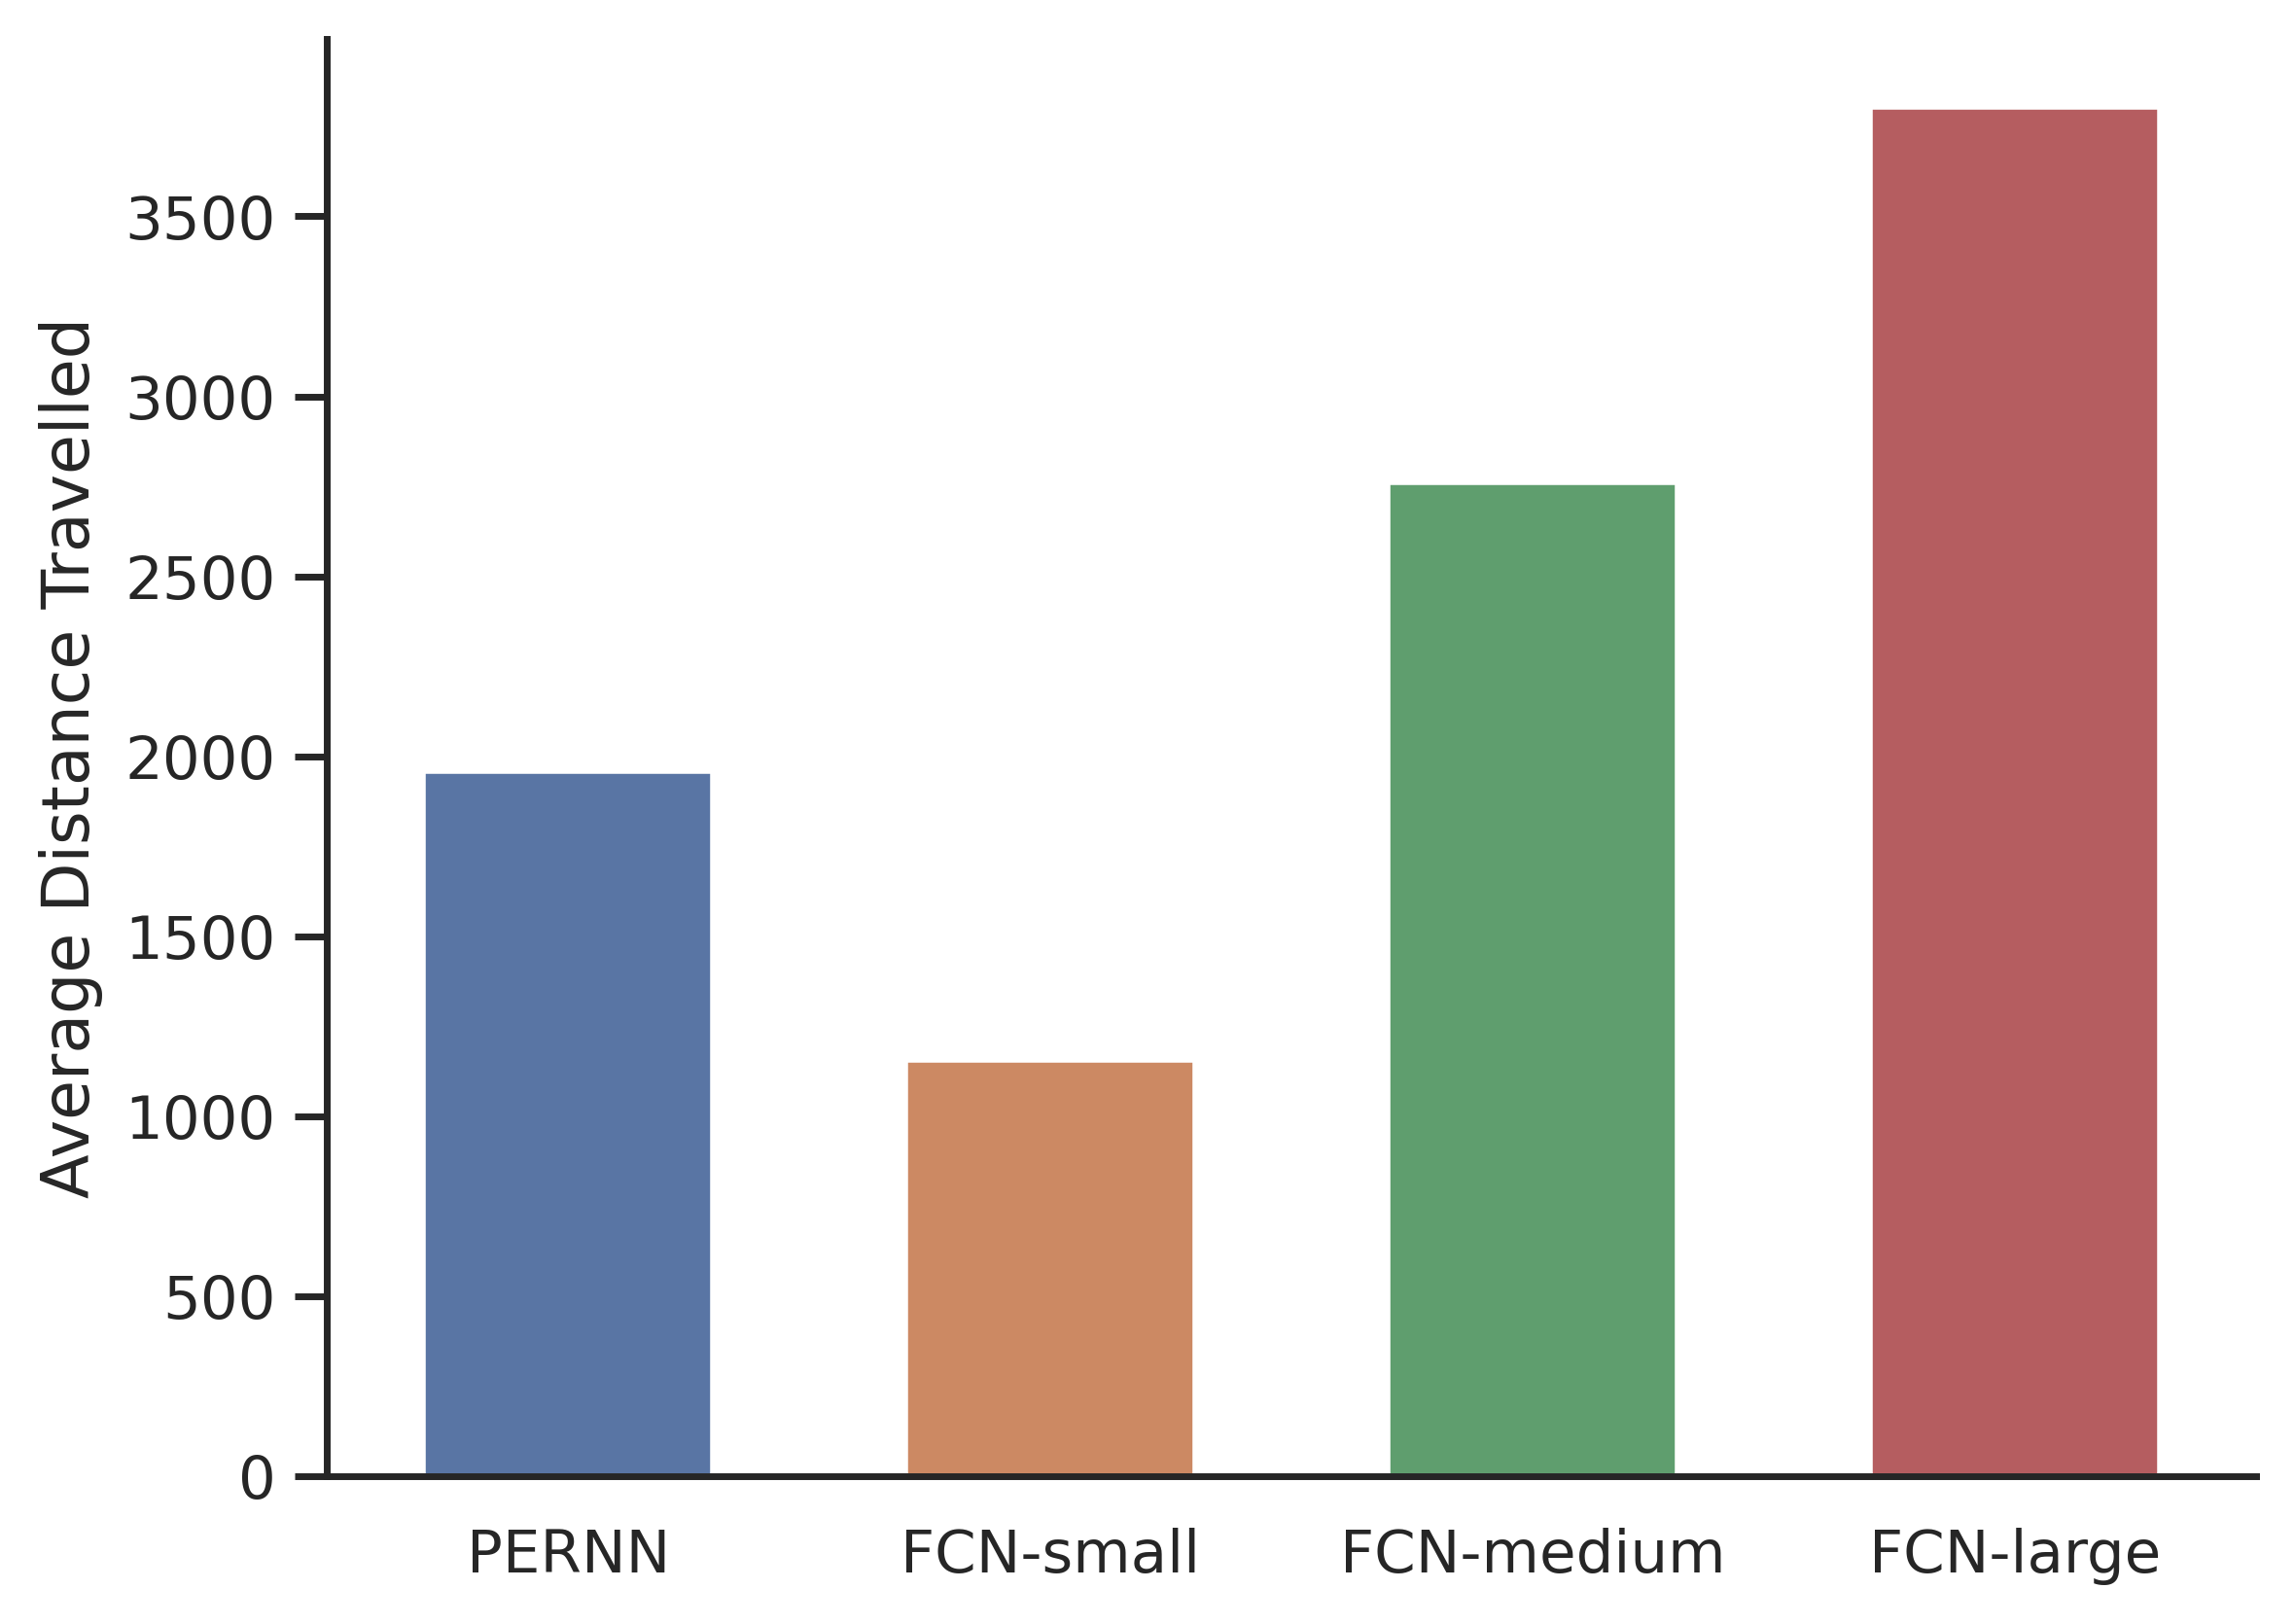

In [15]:

# Dist covered
pi = np.mean([np.max(df['distRaced']) for df in pi_data])
dnn_s = np.mean([np.max(df['distRaced']) for df in dnn_s_data])
dnn_m = np.mean([np.max(df['distRaced']) for df in dnn_m_data])
dnn_l = np.mean([np.max(df['distRaced']) for df in dnn_l_data])



fig, ax = plt.subplots(dpi=400)

ax=sns.barplot(x=['PERNN', 'FCN-small','FCN-medium', 'FCN-large'], y=[pi, dnn_s, dnn_m, dnn_l], width=0.6)

ax.tick_params(bottom=False, left=True)
ax.set_ylabel("Average Distance Travelled")

fig.savefig("avg_dist_all.png")

In [37]:
mae = [0.11, 0.108, 0.01, 0.031]
dists = [250, 600, 3040, 2560]
jerks = [0.05, 4.77, 0.05, 0.002]
params = [7324, 62108, 772764, 2971]
tracks = [5, 14, 25, 5]


In [38]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf',
 '/usr/share/fonts/truetype/freefont/FreeMonoBoldOblique.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/opentype/urw-base35/D050000L.otf',
 '/usr/share/fonts/truetype/teluguvijayam/Gurajada.ttf',
 '/usr/share/fonts/truetype/teluguvijayam/PottiSreeramulu.ttf',
 '/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Regular.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/ariblk.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-Italic.otf',
 '/usr/share/fonts/truetype/tibetan-machine/TibetanMachineUni.ttf',
 '/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Light.ttf',
 '/usr/share/fonts/truetype/msttcorefonts/trebuc.ttf',
 '/usr/share/fonts/truetype/fonts-gujr-extra/padmaa.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Bold.otf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypo-Oblique.ttf',
 '/usr/share/fonts/truetype/tlwg/Waree-Ob

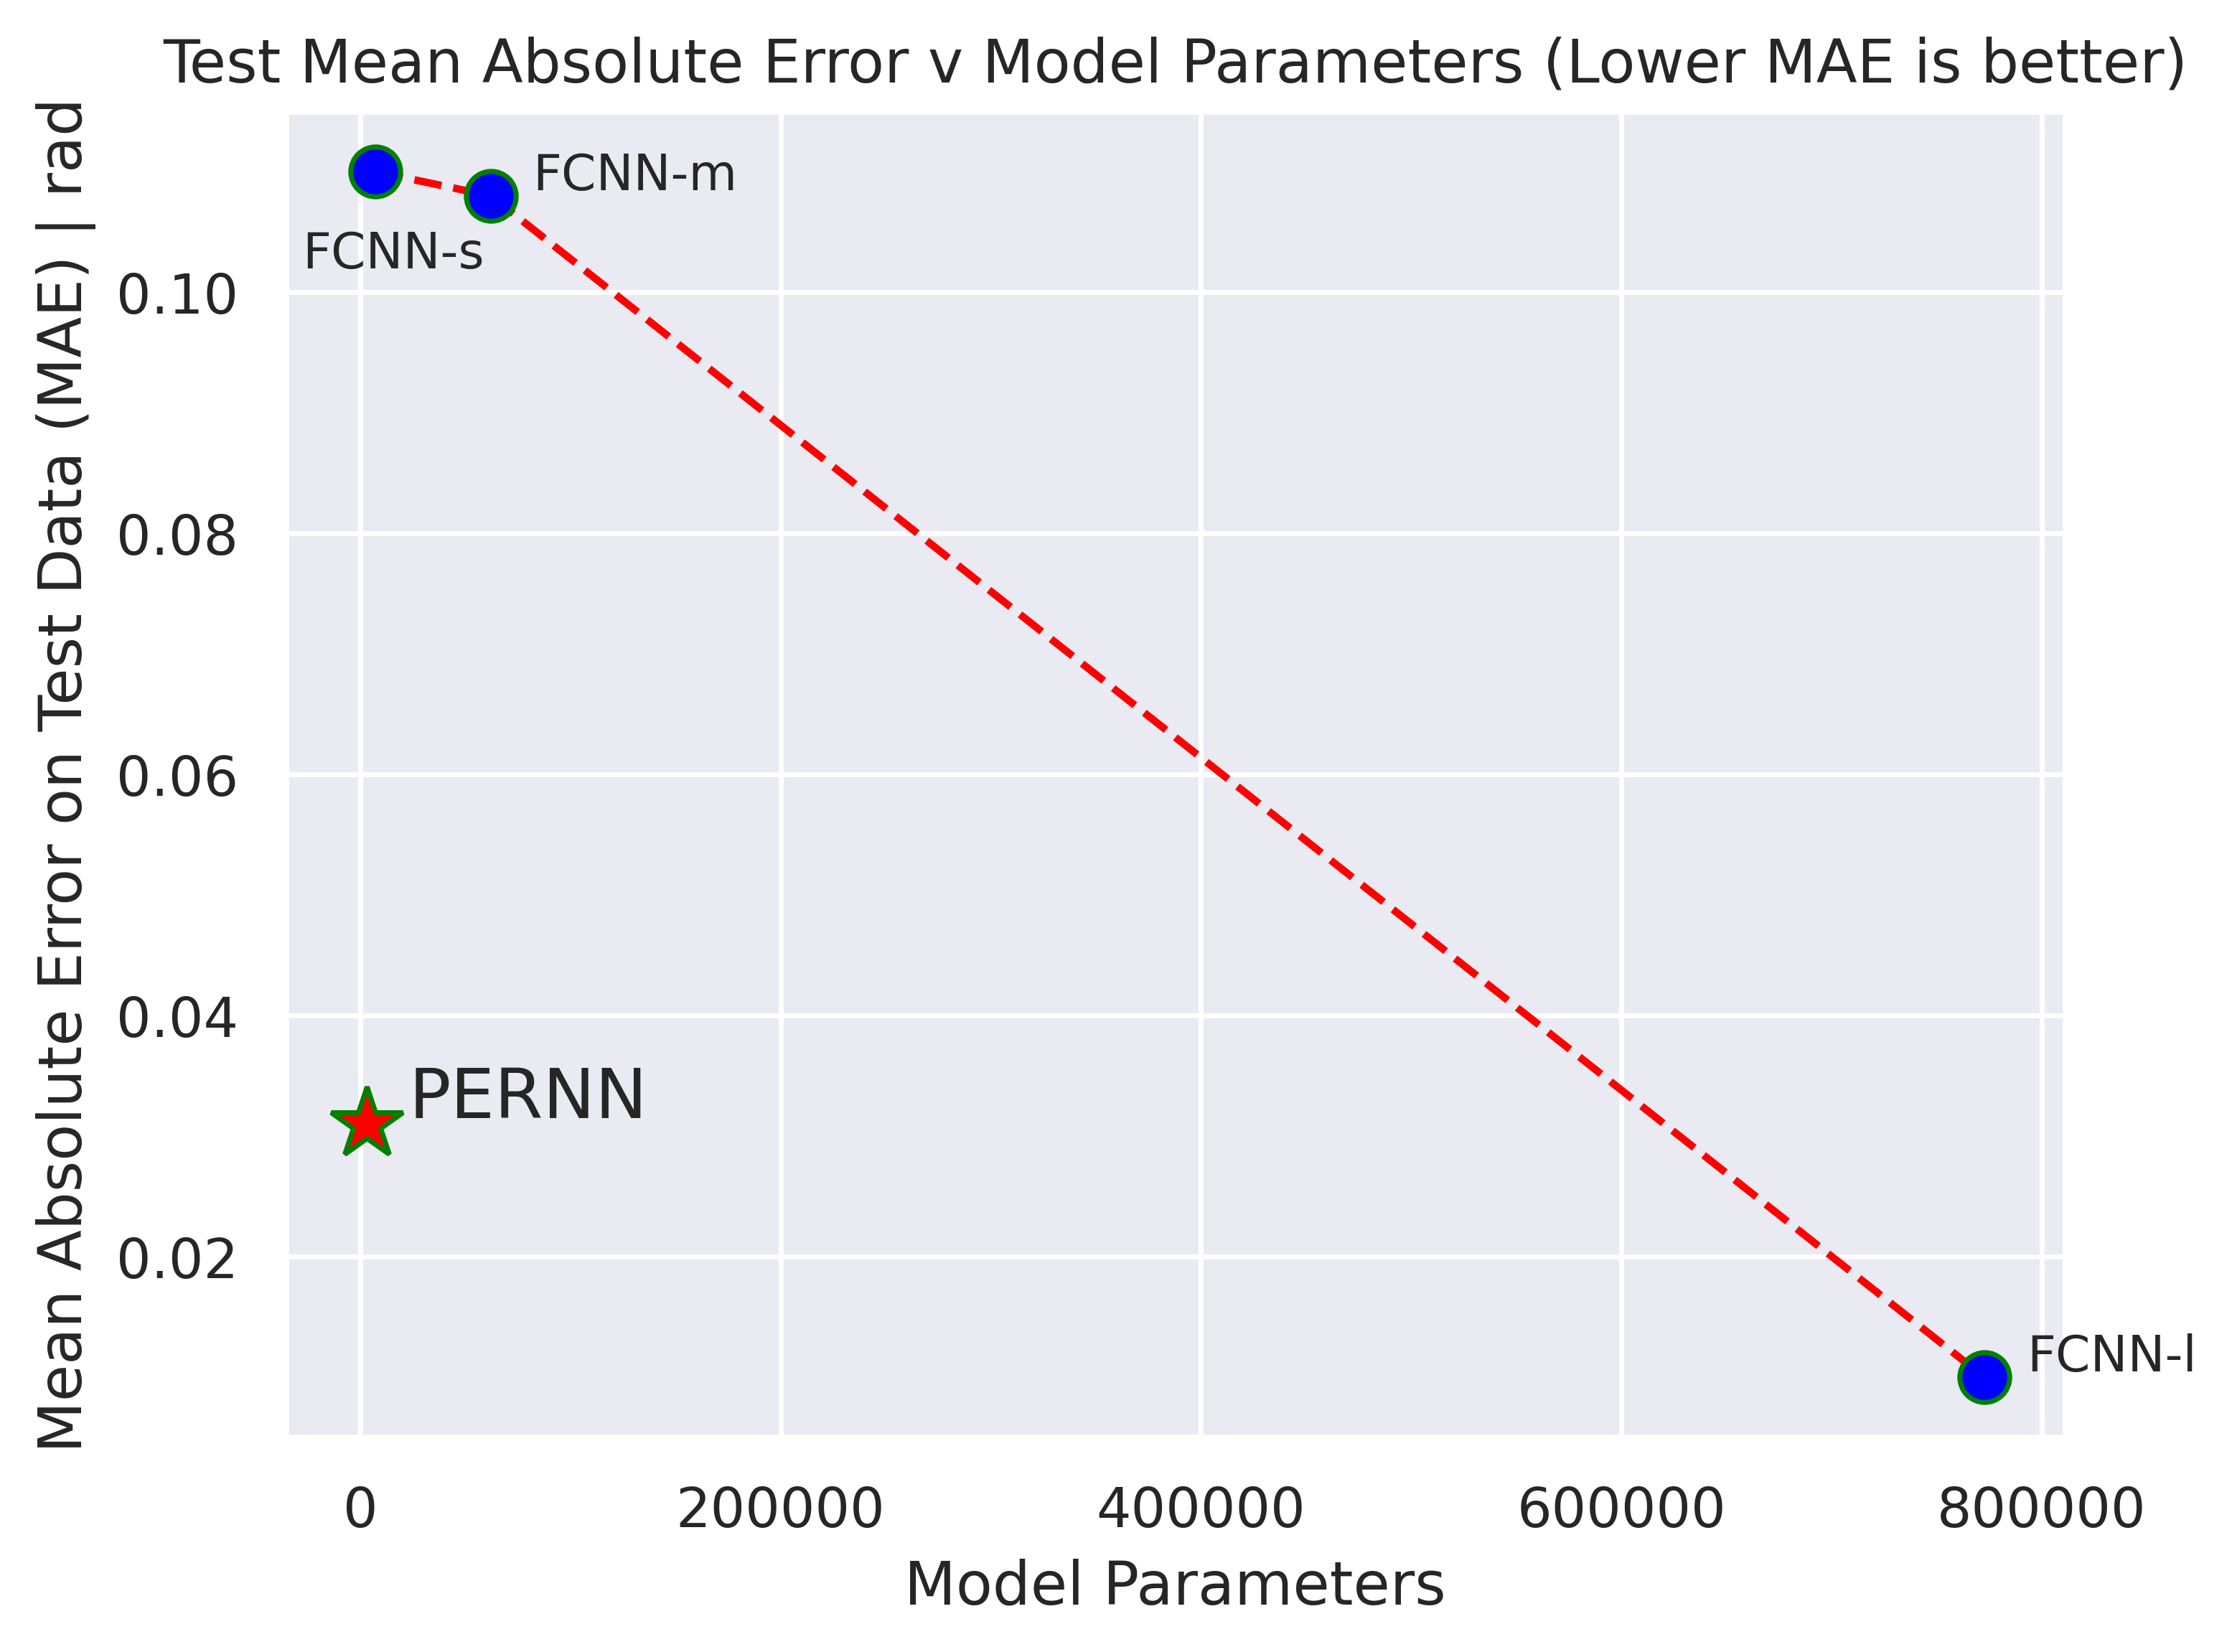

In [205]:
legend = ['FCNN-s', 'FCNN-m', 'FCNN-l', 'PERNN']

fig, ax = plt.subplots(dpi=500)
# p = np.polyfit(params[:-1], mae[:-1], 2)
# pp = np.poly1d(p)

plt.plot(params[:-1], mae[:-1], marker='o', markersize=10, mec='green',  mfc='blue', linestyle='--', color='red')

plt.plot(params[-1:], mae[-1:], marker='*', markersize=15, mec='green',  mfc='red', linestyle='--', color='red')
# plt.plot(params[:-1], pp(params[:-1]))

plt.annotate(legend[0], (params[0] - 35000, mae[0] - 0.008), fontsize=10)

plt.annotate(legend[1], (params[1] + 20000, mae[1] + 0.0005), fontsize=10)

plt.annotate(legend[2], (params[2] + 20000, mae[2] + 0.0005), fontsize=10)

plt.annotate(legend[3], (params[3] + 20000, mae[3] + 0.0005), fontsize=14)

plt.locator_params(axis='x', nbins=6)

plt.title("Test Mean Absolute Error v Model Parameters (Lower MAE is better)")
plt.ylabel("Mean Absolute Error on Test Data (MAE) | rad")
plt.xlabel("Model Parameters")

fig.savefig("MAEvParams.png")

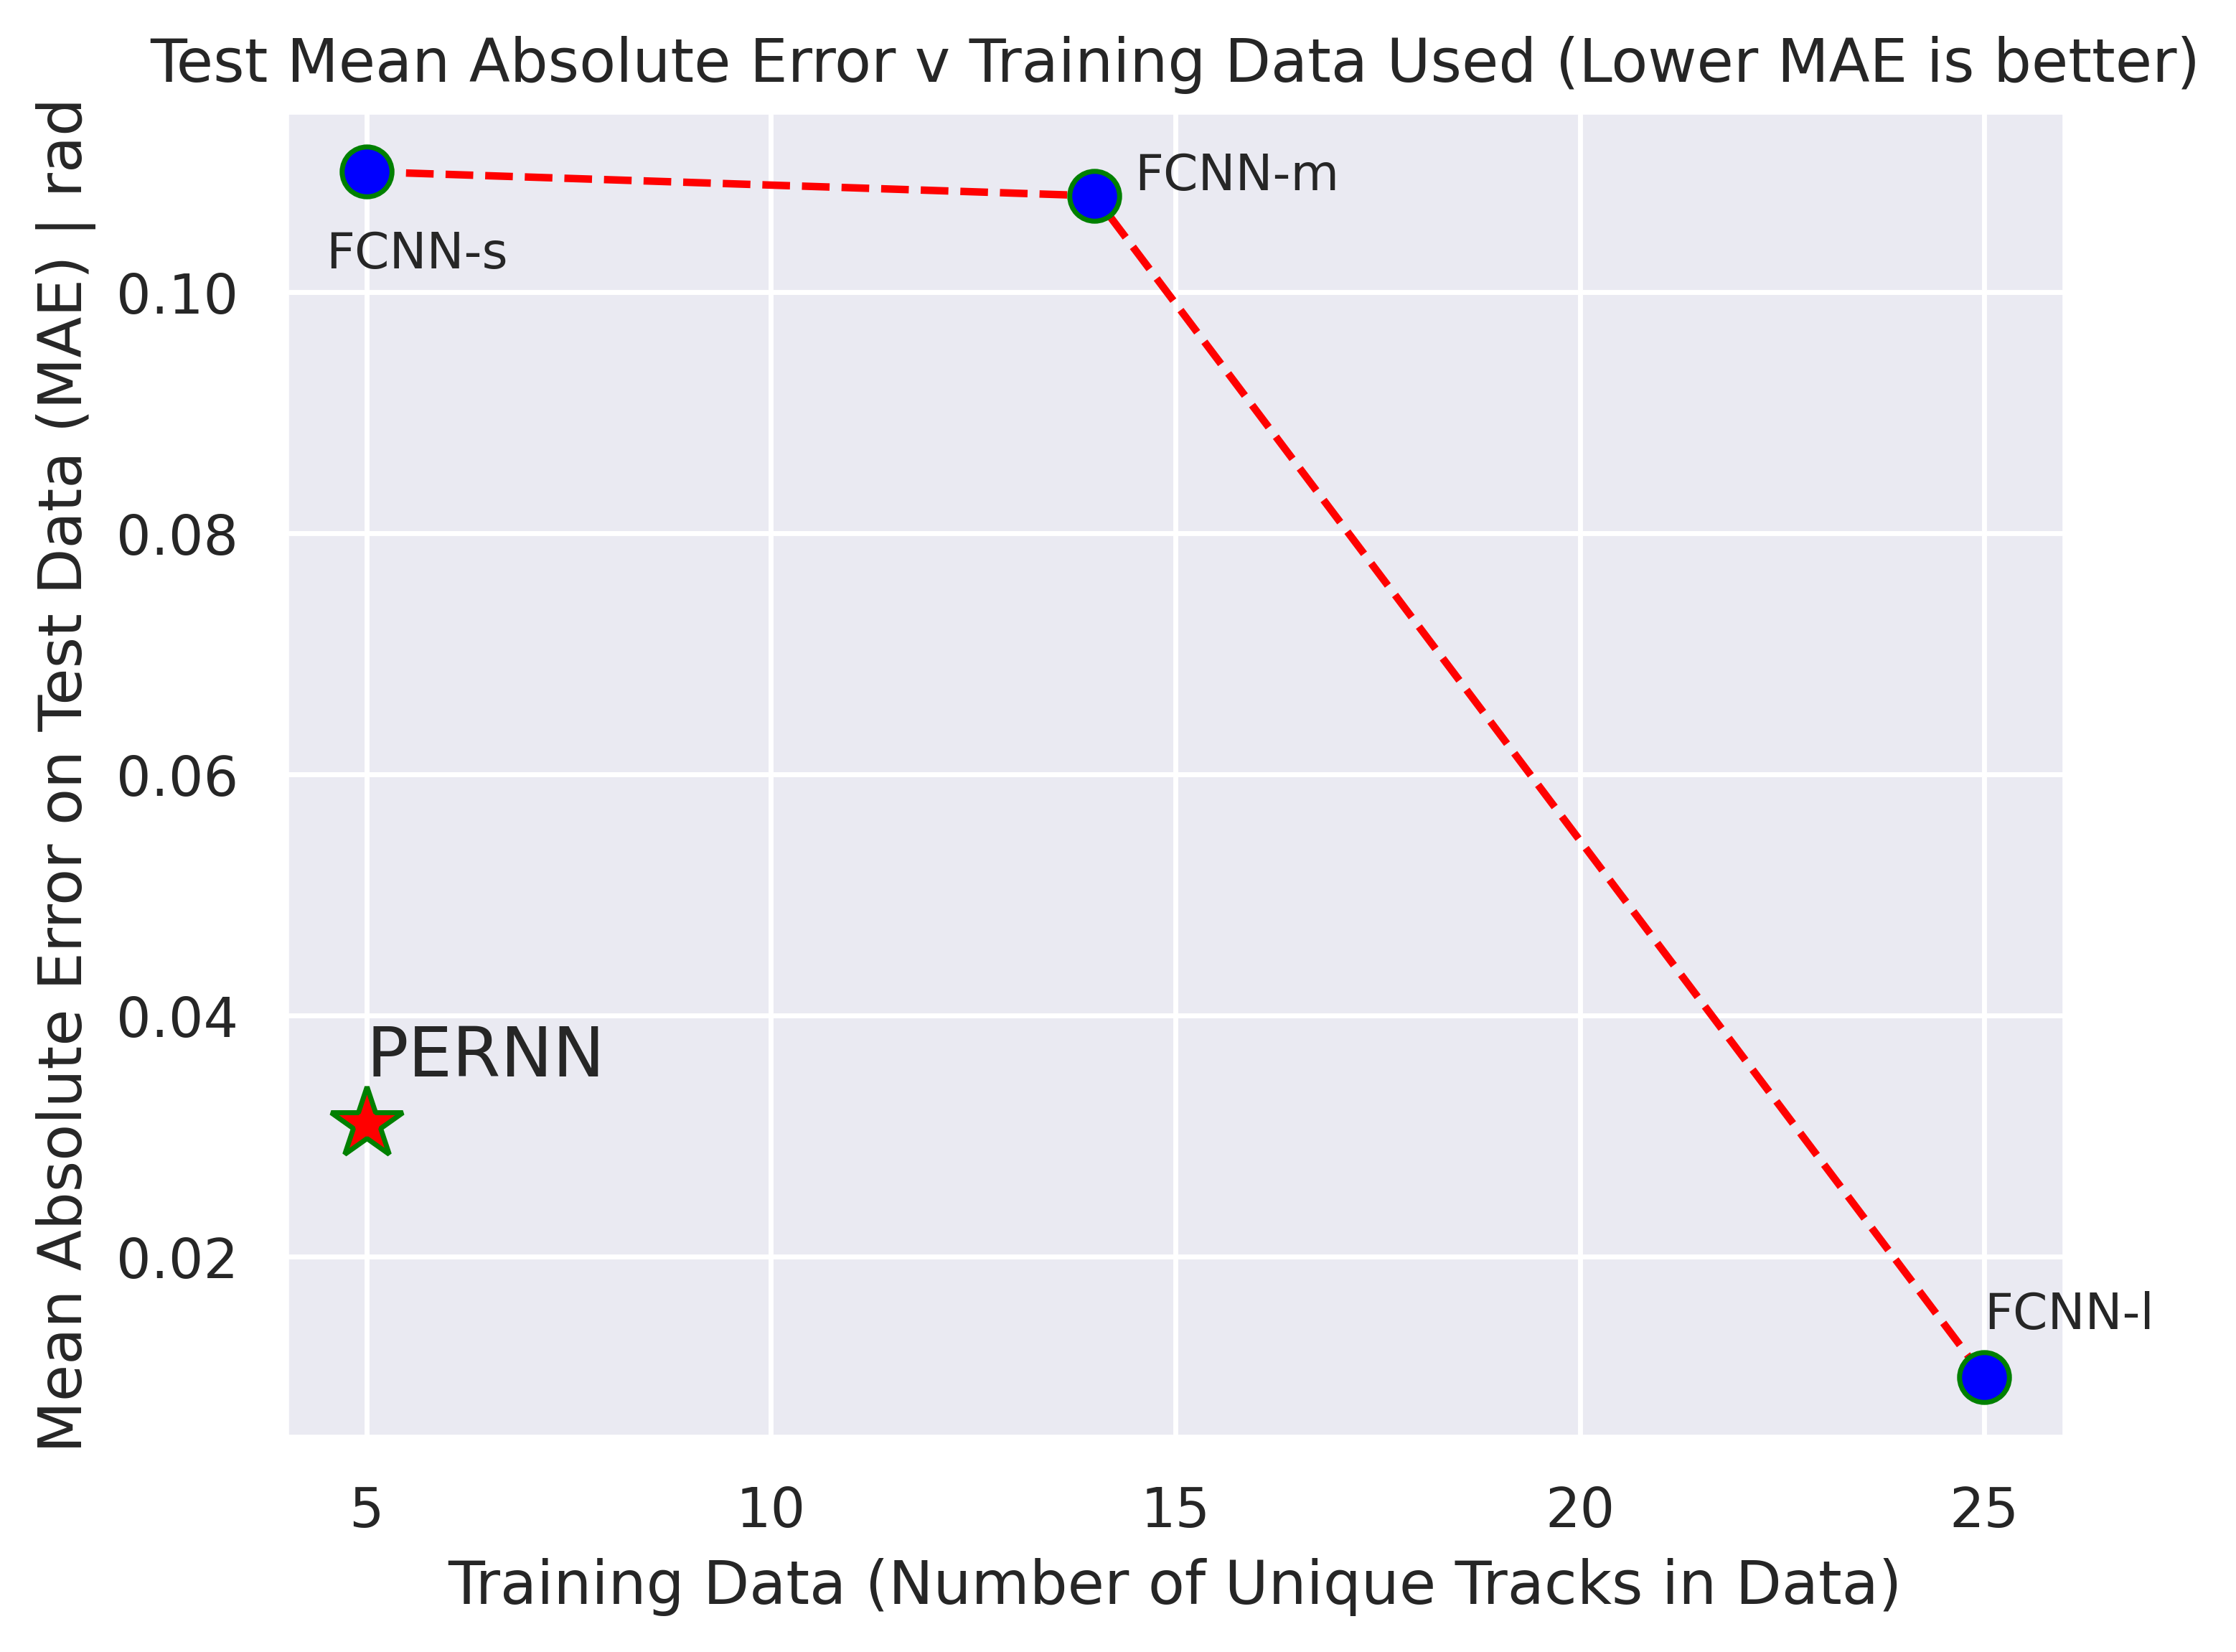

In [217]:
legend = ['FCNN-s', 'FCNN-m', 'FCNN-l', 'PERNN']

fig, ax = plt.subplots(dpi=500)
# p = np.polyfit(params[:-1], mae[:-1], 2)
# pp = np.poly1d(p)

plt.plot(tracks[:-1], mae[:-1], marker='o', markersize=10, mec='green',  mfc='blue', linestyle='--', color='red')

plt.plot(tracks[-1:], mae[-1:], marker='*', markersize=15, mec='green',  mfc='red', linestyle='--', color='red')
# plt.plot(params[:-1], pp(params[:-1]))

plt.annotate(legend[0], (tracks[0] - 0.5, mae[0] - 0.008), fontsize=10)

plt.annotate(legend[1], (tracks[1] + 0.5, mae[1] + 0.0005), fontsize=10)

plt.annotate(legend[2], (tracks[2], mae[2] + 0.004), fontsize=10)

plt.annotate(legend[3], (tracks[3], mae[3] + 0.004), fontsize=14)

plt.locator_params(axis='x', nbins=6)

plt.title("Test Mean Absolute Error v Training Data Used (Lower MAE is better)")
plt.ylabel("Mean Absolute Error on Test Data (MAE) | rad")
plt.xlabel("Training Data (Number of Unique Tracks in Data)")

fig.savefig("MAEvTracks.png")

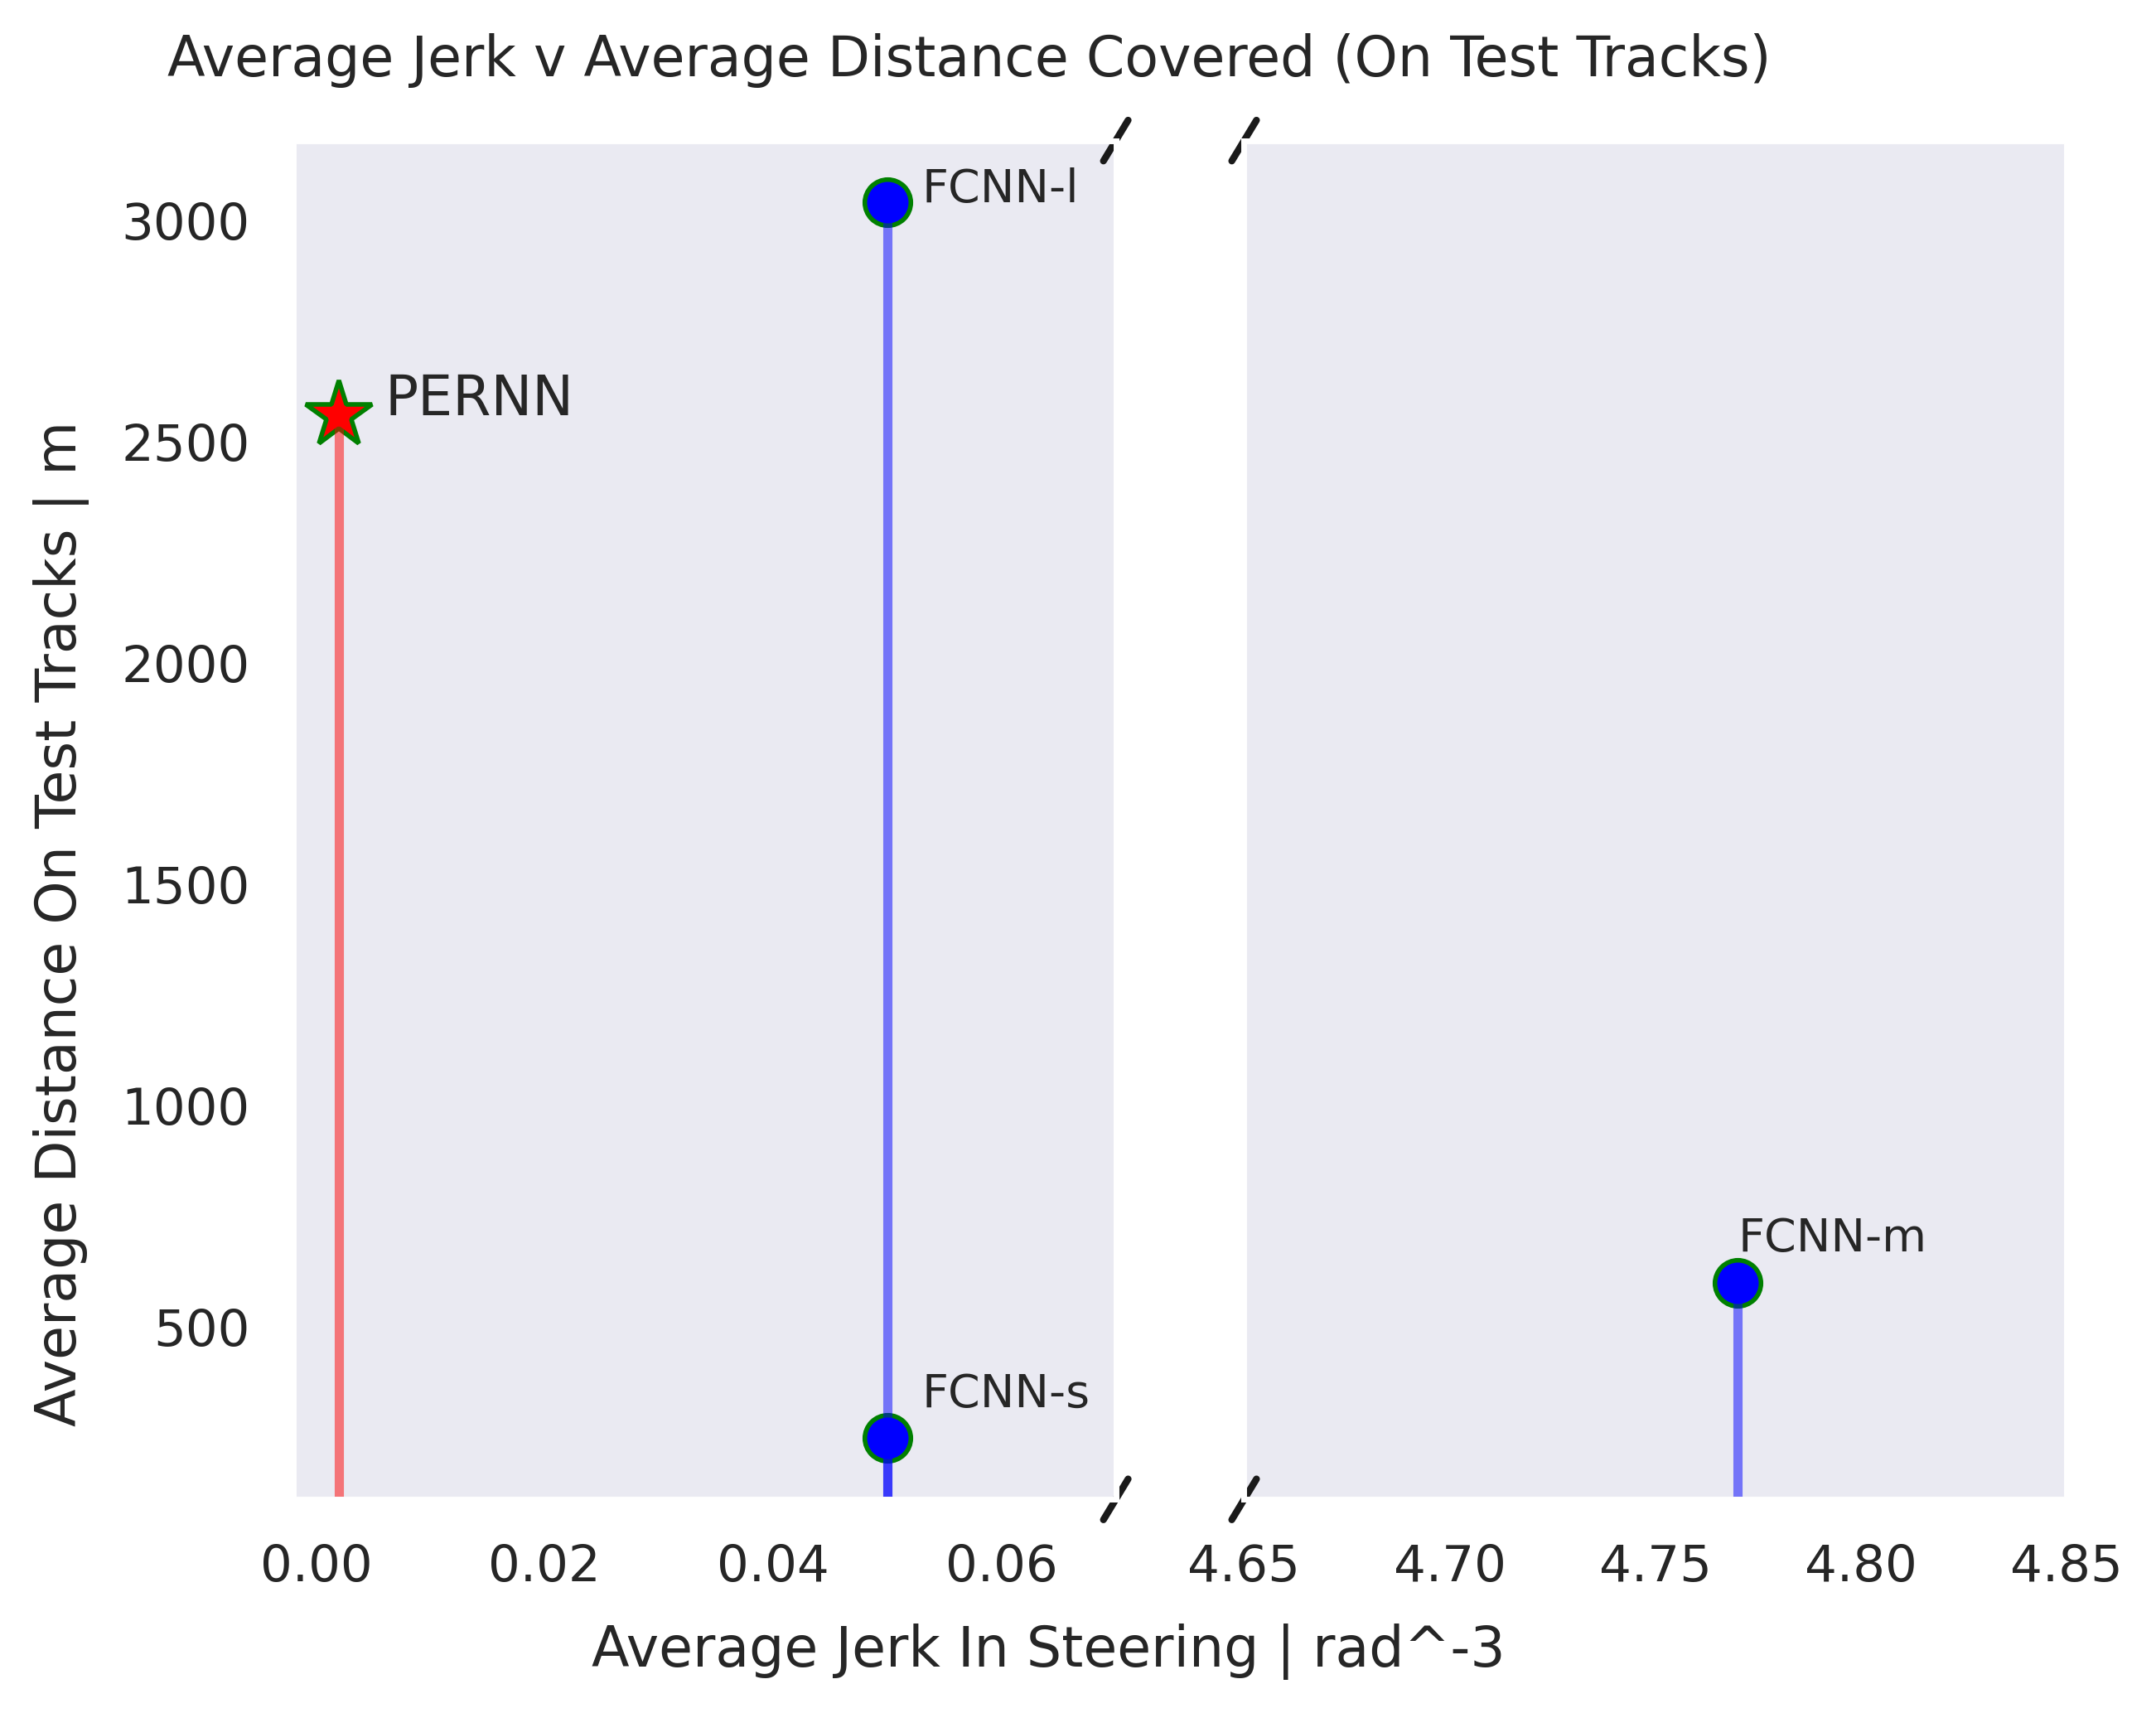

In [337]:
sns.set()

legend = ['FCNN-s', 'FCNN-m', 'FCNN-l', 'PERNN']

fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w', dpi=400, tight_layout=True)

# p = np.polyfit(params[:-1], mae[:-1], 2)
# pp = np.poly1d(p)

ax.plot(jerks[:1], dists[:1], marker='o', markersize=10, mec='green',  mfc='blue', color='red')
ax.plot(jerks[1:2], dists[1:2], marker='o', markersize=10, mec='green',  mfc='blue', color='red')
ax.plot(jerks[2:3], dists[2:3], marker='o', markersize=10, mec='green',  mfc='blue', color='red')

ax.plot(jerks[-1:], dists[-1:], marker='*', markersize=15, mec='green',  mfc='red', color='red')

ax2.plot(jerks[:1], dists[:1], marker='o', markersize=10, mec='green',  mfc='blue', color='red')
ax2.plot(jerks[1:2], dists[1:2], marker='o', markersize=10, mec='green',  mfc='blue', color='red')
ax2.plot(jerks[2:3], dists[2:3], marker='o', markersize=10, mec='green',  mfc='blue', color='red')

ax2.plot(jerks[-1:], dists[-1:], marker='*', markersize=15, mec='green',  mfc='red', color='red')



ax.set_xlim(-0.002, 0.07)
ax2.set_xlim(4.65, 4.85)


# ax2.set_yticklabels([])
ax2.set_ylabel(None)

# hide the spines between ax and ax2
# ax.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
# ax2.yaxis.tick_right()
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)


ax.annotate(legend[0], (jerks[0] + 0.003, dists[0] + 70), fontsize=10)

ax2.annotate(legend[1], (jerks[1], dists[1] + 70), fontsize=10)

ax.annotate(legend[2], (jerks[2] + 0.003, dists[2] + 0.004), fontsize=10)

ax.annotate(legend[3], (jerks[3] + 0.004, dists[3] + 0.004), fontsize=12)

ax2.locator_params(axis='x', nbins=5)

ax.axvline(x=jerks[-1], ymin=0, ymax=0.80, color='red', alpha=0.5, lw=2)
ax.axvline(x=jerks[0], ymin=0, ymax=0.05, color='blue', alpha=0.5, lw=2)
ax2.axvline(x=jerks[1], ymin=0, ymax=0.17, color='blue', alpha=0.5, lw=2)

ax.axvline(x=jerks[2], ymin=0, ymax=0.95, color='blue', alpha=0.5, lw=2)


ax.grid(False)
ax2.grid(False)



fig.text(0.05, 1, "Average Jerk v Average Distance Covered (On Test Tracks)", va='center')


fig.text(0, 0.15, "Average Distance On Test Tracks | m", ha='center', rotation='vertical')
fig.text(0.25, 0, 'Average Jerk In Steering | rad^-3', va='center')

# plt.ylabel("Average Distance On Test Tracks | m")
# ax.set_xlabel("Average Jerk In Steering | rad^-3")

fig.savefig("DistVJerk.png", bbox_inches='tight')

In [50]:
x_pos = np.arange(0, 0.5, 0.25)
# Dist covered
pi = np.mean([np.max(df['distRaced']) for df in pi_data])
dnn = np.mean([np.max(df['distRaced']) for df in dnn_data])

plt.bar(x_pos, [dnn, pi], width=0.1, align='center')
plt.ylabel("Average Distance Travelled")

plt.xticks(x_pos, ['DNN','PINN'])

NameError: name 'dnn_data' is not defined

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(dnn_data[0]['angle'])
plt.plot(pi_data[0]['angle'])
plt.xlim(0, 200)

plt.ylabel("Relative Angle of Car Axis")
plt.xlabel("Time Steps")
plt.legend(['DNN','PINN'])

NameError: name 'dnn_data' is not defined

<Figure size 1200x500 with 0 Axes>

In [117]:
plt.figure(figsize=(12, 5))
plt.plot(pp_data[1]['steer'])
plt.plot(dnn_data[1]['steer'])
plt.plot(pi_data[1]['steer'])

plt.xlim(0, 200)

plt.ylabel("Steering Angle")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'])

NameError: name 'pp_data' is not defined

<Figure size 1200x500 with 0 Axes>

In [202]:
pp_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pp_track_new]]
pi_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pi_track_new]]



In [204]:
pp_data

[        angle   distRaced  trackPos     speedX     speedY    speedZ     steer   
 0    0.002626   -0.010498 -0.333208  -0.242614   0.001294  0.019782  0.000000  \
 1    0.002717    0.059326 -0.333214   2.875270   0.017514  0.152309  0.000000   
 2    0.002627    0.299316 -0.333367   5.721970  -0.010166  0.337194  0.000000   
 3    0.002518    0.710693 -0.333521   9.078430   0.008275  0.541281  0.000000   
 4    0.002467    1.300050 -0.333735  12.296100   0.000616  0.717832  0.000000   
 ..        ...         ...       ...        ...        ...       ...       ...   
 133 -0.561924  286.575000 -0.701051  77.289500  -4.233650  1.557360 -0.684905   
 134 -0.562449  290.901000 -0.227053  73.050700   7.086070  1.636190 -1.000000   
 135 -0.431906  293.921000  0.268514  65.006300  17.325100  1.474060 -1.000000   
 136 -0.238651  296.284000  0.711419  54.775900  22.821100  1.219010 -1.000000   
 137  0.069583  298.921000  1.016420  45.010100  22.842400  0.739555 -1.075000   
 
      accel  l

Text(0, 0.5, 'Average Distance Travelled')

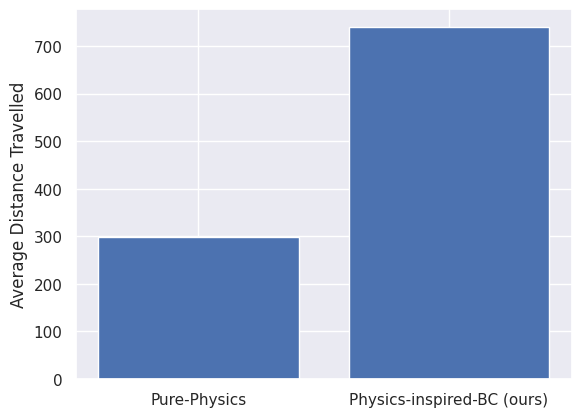

In [205]:
# Dist covered
pp = np.mean([np.max(df['distRaced']) for df in pp_data])
pi = np.mean([np.max(df['distRaced']) for df in pi_data])

plt.bar(['Pure-Physics','Physics-inspired-BC (ours)'], [pp, pi])
plt.ylabel("Average Distance Travelled")


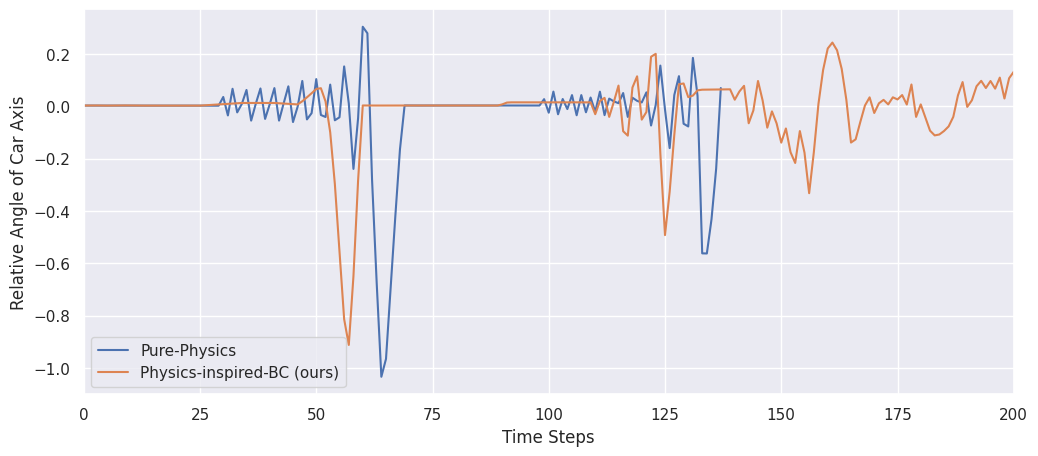

In [206]:
plt.figure(figsize=(12, 5))
plt.plot(pp_data[0]['angle'])
plt.plot(pi_data[0]['angle'])
plt.xlim(0, 200)

plt.ylabel("Relative Angle of Car Axis")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics','Physics-inspired-BC (ours)'])

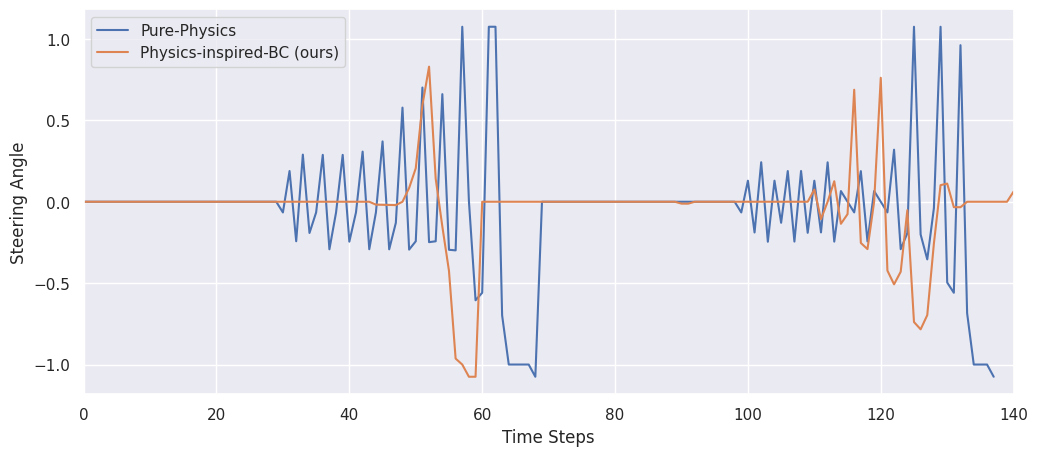

In [210]:
plt.figure(figsize=(12, 5))
plt.plot(pp_data[0]['steer'])
plt.plot(pi_data[0]['steer'])

plt.xlim(0, 140)

plt.ylabel("Steering Angle")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Physics-inspired-BC (ours)'])

In [19]:
pp_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pp_track_1,pp_track_2,pp_track_3]]
pi_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pi_track_1,pi_track_2,pi_track_3]]
dnn_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [dnn_track_1,dnn_track_2,dnn_track_3]]



# Dist covered
pp = np.mean([np.max(df['distRaced']) for df in pp_data])
pi = np.mean([np.max(df['distRaced']) for df in pi_data])
dnn = np.mean([np.max(df['distRaced']) for df in dnn_data])

plt.bar(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'], [pp, dnn, pi])
plt.ylabel("Average Distance Travelled")


plt.figure(figsize=(12, 5))
plt.plot(pp_data[1]['angle'])
plt.plot(dnn_data[1]['angle'])
plt.plot(pi_data[1]['angle'])
plt.xlim(0, 200)

plt.ylabel("Relative Angle of Car Axis")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'])

plt.figure(figsize=(12, 5))
plt.plot(pp_data[1]['steer'])
plt.plot(dnn_data[1]['steer'])
plt.plot(pi_data[1]['steer'])

plt.xlim(0, 200)

plt.ylabel("Steering Angle")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'])

NameError: name 'pp_track_1' is not defined